<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Кодирование-и-разбивка" data-toc-modified-id="Кодирование-и-разбивка-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Кодирование и разбивка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей-(логическая-регрессия-и-случайный-лес)" data-toc-modified-id="Обучение-моделей-(логическая-регрессия-и-случайный-лес)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение моделей (логическая регрессия и случайный лес)</a></span></li><li><span><a href="#Исследование-баланса-классов-целевого-признака" data-toc-modified-id="Исследование-баланса-классов-целевого-признака-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование баланса классов целевого признака</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#class_weight" data-toc-modified-id="class_weight-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>class_weight</a></span></li><li><span><a href="#Изменение-выборки-(уменьшение)" data-toc-modified-id="Изменение-выборки-(уменьшение)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение выборки (уменьшение)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Признаки

    - RowNumber — индекс строки в данных
    - CustomerId — уникальный идентификатор клиента
    - Surname — фамилия
    - CreditScore — кредитный рейтинг
    - Geography — страна проживания
    - Gender — пол
    - Age — возраст
    - Tenure — сколько лет человек является клиентом банка
    - Balance — баланс на счёте
    - NumOfProducts — количество продуктов банка, используемых клиентом
    - HasCrCard — наличие кредитной карты
    - IsActiveMember — активность клиента
    - EstimatedSalary — предполагаемая зарплата


Целевой признак

    - Exited — факт ухода клиента

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Столбцы RowNumber, CustomerId и Surname явно излишне.

С типом данных всё вроде как в порядке, а вот название столбцов, желательно, привести к нижнему регистру и разделить где нужно нижним подчеркиванием, чтоб красиво стало.

В стоблце Tenure 900 пропусков, скорее всего пропуски обозначают, что клиент ранее не был клиентов банка или является им менее года, заполним их медианой

In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
data.columns = map(str.lower, data.columns)

In [6]:
data = data.rename(columns={'creditscore':'credit_score','numofproducts':'num_of_products', 
                            'hascrcard':'has_cr_card', 'isactivemember':'is_active_member',
                            'estimatedsalary':'es_timated_salary'})

In [7]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

### Кодирование и разбивка

Чтоб преообразовать категориальные признаки в количественные используем прямое кодирование, после разобьём данные на три выборки (valid, train u test) и маштабируем признаки с помощью стандартизации.

In [8]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [9]:
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(features, target, 
                                                                            test_size=.5, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, 
                                                                            test_size=.5, random_state=12345)

In [10]:
warnings.filterwarnings('ignore')
numeric = ['credit_score', 'age', 'balance', 'es_timated_salary', 'tenure', 'num_of_products']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [11]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(5000, 11)
(2500, 11)
(2500, 11)


### Вывод

    - избавились от излишних данных ('RowNumber', 'CustomerId', 'Surname')
    - привели все столбцы к нижнему регистру
    - заполнили просупка в столбце 'tenure' медианой
    - преообразовать категориальные признаки в количественные используя прямое кодирование, после разобили данные на три выборки (valid, train u test) и маштабировали признаки с помощью стандартизации

## Исследование задачи

### Обучение моделей (логическая регрессия и случайный лес)

In [12]:
model = LogisticRegression(random_state=12345,solver = 'liblinear')
model.fit(features_train, target_train)
predicted_valid_logist = pd.Series(model.predict(features_valid))
print('LogisticRegression')
print("f1-мера: ", f1_score(target_valid, predicted_valid_logist))

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one))

LogisticRegression
f1-мера:  0.31001371742112477
roc_auc: 0.7298593982228125


In [13]:
for est in range(40, 140, 20):
    for depth in range(5, 11, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        roс_auc = roc_auc_score(target_valid, probabilities_one)
        
        predicted_valid_forest = pd.Series(model.predict(features_valid))
        f1 = f1_score(target_valid, predicted_valid_forest)
        
        print("max_depth:", depth, "и n_estimators:", est)
        print("f1:", f1)
        print("roс_auc:", roс_auc)
        print()

max_depth: 5 и n_estimators: 40
f1: 0.47058823529411775
roс_auc: 0.8327023645764159

max_depth: 6 и n_estimators: 40
f1: 0.5129604365620737
roс_auc: 0.8354639028555165

max_depth: 7 и n_estimators: 40
f1: 0.5372340425531915
roс_auc: 0.8413447095468487

max_depth: 8 и n_estimators: 40
f1: 0.5521628498727735
roс_auc: 0.8414227777250736

max_depth: 9 и n_estimators: 40
f1: 0.55198973042362
roс_auc: 0.8375836021250356

max_depth: 10 и n_estimators: 40
f1: 0.5433673469387755
roс_auc: 0.8363636633146759

max_depth: 5 и n_estimators: 60
f1: 0.45207439198855515
roс_auc: 0.8333659440913259

max_depth: 6 и n_estimators: 60
f1: 0.5041095890410959
roс_auc: 0.8368839531353762

max_depth: 7 и n_estimators: 60
f1: 0.5274431057563588
roс_auc: 0.8412493477848403

max_depth: 8 и n_estimators: 60
f1: 0.5461538461538461
roс_auc: 0.8410205783764981

max_depth: 9 и n_estimators: 60
f1: 0.5397653194263363
roс_auc: 0.8383020270056605

max_depth: 10 и n_estimators: 60
f1: 0.5576679340937897
roс_auc: 0.83619764

In [14]:
model = RandomForestClassifier(n_estimators=80, max_depth=10, random_state=12345)
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))
print('RandomForestClassifier')
print("f1-мера: ", f1_score(target_valid, predicted_valid_forest))

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one))

RandomForestClassifier
f1-мера:  0.561314791403287
roc_auc: 0.8371092638269615


### Исследование баланса классов целевого признака

Много ли 0.83 или мало? Для понимания этого, исследуем целевой признак (еxited).

0    0.7963
1    0.2037
Name: exited, dtype: float64

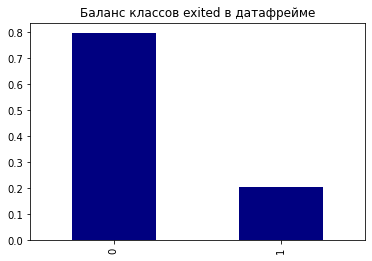

In [15]:
frequency = data['exited'].value_counts(normalize=True)
display(frequency)

frequency.plot(kind='bar', colormap='jet', title = 'Баланс классов exited в датафрейме');

Баланс явно нарушен, соотношение идет 4 к 1 (клиент уходит в 20% случаев), теперь посмотрим какие прогнозы выдвигают модели.

0    0.9116
1    0.0884
dtype: float64


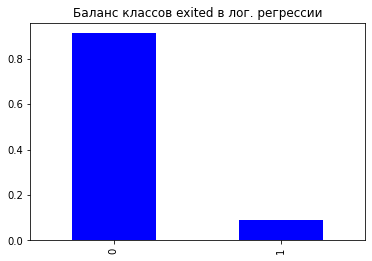

In [16]:
frequency_logist = predicted_valid_logist.value_counts(normalize=True)
print(frequency_logist)
frequency_logist.plot(kind='bar', color='b', title='Баланс классов exited в лог. регрессии');

0    0.8868
1    0.1132
dtype: float64


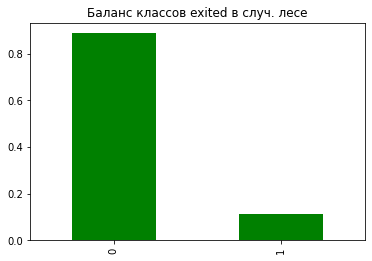

In [17]:
frequency_forest = predicted_valid_forest.value_counts(normalize=True)
print(frequency_forest)
frequency_forest.plot(kind='bar', color='g', title='Баланс классов exited в случ. лесе');

Модели верят в лучшее) А теперь сравним их с константной моделью

In [18]:
target_pred_constant = pd.Series(0, target.index)
accuracy_score(target, target_pred_constant)

0.7963

Чтож модели оказались адекватные, они предсказывают лучше константной модели. Теперь оценим качество прогноза положительного класса у моделей с помощью F1-меры.

In [19]:
print("LogisticRegression f1:", f1_score(target_valid, predicted_valid_logist))

LogisticRegression f1: 0.31001371742112477


In [20]:
print("RandomForestClassifier f1:", f1_score(target_valid, predicted_valid_forest))

RandomForestClassifier f1: 0.561314791403287


Модель случайного леса почти близка к F1-мере 0.59, а вот логической регрессия до неё, как до китайской границы пешком, но это не значит, что достичь её не возможно.

### Вывод
    - классы не сбалансированны
    - модели адекватно предсказывают
    - слачайный лес показал себя лучше, чем логическая регрессия

## Борьба с дисбалансом

### Изменение порога

In [21]:
def threshold (probabilities_one_valid):
    for threshold in np.arange(0, 0.6, 0.05):
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        print("порог = {:.2f} | f1 = {:.3f}".format(
        threshold, f1))

In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid_logist = model.predict_proba(features_valid)
probabilities_one_valid_logist = probabilities_valid_logist[:, 1]

In [23]:
threshold(probabilities_one_valid_logist)

порог = 0.00 | f1 = 0.338
порог = 0.05 | f1 = 0.365
порог = 0.10 | f1 = 0.409
порог = 0.15 | f1 = 0.439
порог = 0.20 | f1 = 0.450
порог = 0.25 | f1 = 0.456
порог = 0.30 | f1 = 0.442
порог = 0.35 | f1 = 0.419
порог = 0.40 | f1 = 0.391
порог = 0.45 | f1 = 0.356
порог = 0.50 | f1 = 0.310
порог = 0.55 | f1 = 0.267


In [24]:
model = RandomForestClassifier(n_estimators=80, max_depth=10, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

In [25]:
threshold(probabilities_one_valid_forest)

порог = 0.00 | f1 = 0.338
порог = 0.05 | f1 = 0.401
порог = 0.10 | f1 = 0.461
порог = 0.15 | f1 = 0.522
порог = 0.20 | f1 = 0.555
порог = 0.25 | f1 = 0.591
порог = 0.30 | f1 = 0.598
порог = 0.35 | f1 = 0.594
порог = 0.40 | f1 = 0.582
порог = 0.45 | f1 = 0.565
порог = 0.50 | f1 = 0.561
порог = 0.55 | f1 = 0.531


Порог для логической регресси в 0.25 лучше всего себя показал, а для случайного леса лучше 0.30

### class_weight

In [26]:
model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_logist = pd.Series(model.predict(features_valid))
f1 = f1_score(target_valid, predicted_valid_logist)

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
ros_auc = roc_auc_score(target_valid, probabilities_one)

print('LogisticRegression')
print('f1:', f1)
print('ros_auc:', ros_auc)

LogisticRegression
f1: 0.457182320441989
ros_auc: 0.7338319814691838


In [27]:
for est in range(40, 140, 20):
    for depth in range(5, 11, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        
        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        ros_auc = roc_auc_score(target_valid, probabilities_one)
        
        predicted_valid_forest = pd.Series(model.predict(features_valid))
        f1 = f1_score(target_valid, predicted_valid_forest)
        
        print("max_depth:", depth, "и n_estimators:", est)
        print("f1:", f1)
        print("ros_auc:", ros_auc)
        print()

max_depth: 5 и n_estimators: 40
f1: 0.5645295587010825
ros_auc: 0.8250358718337919

max_depth: 6 и n_estimators: 40
f1: 0.5586776859504132
ros_auc: 0.8303104148878979

max_depth: 7 и n_estimators: 40
f1: 0.5729076790336496
ros_auc: 0.8375653203364638

max_depth: 8 и n_estimators: 40
f1: 0.5742935278030994
ros_auc: 0.8377179979761565

max_depth: 9 и n_estimators: 40
f1: 0.5855940130963518
ros_auc: 0.8345162144641559

max_depth: 10 и n_estimators: 40
f1: 0.584
ros_auc: 0.8404686660025932

max_depth: 5 и n_estimators: 60
f1: 0.5659163987138264
ros_auc: 0.8257819664484711

max_depth: 6 и n_estimators: 60
f1: 0.5613168724279836
ros_auc: 0.8316672200613477

max_depth: 7 и n_estimators: 60
f1: 0.5721694036300777
ros_auc: 0.837502569332448

max_depth: 8 и n_estimators: 60
f1: 0.5778985507246376
ros_auc: 0.8373978196249565

max_depth: 9 и n_estimators: 60
f1: 0.5907808090310442
ros_auc: 0.8365598219650257

max_depth: 10 и n_estimators: 60
f1: 0.582
ros_auc: 0.8406801418271511

max_depth: 5 и n_

In [28]:
model = RandomForestClassifier(n_estimators=120, max_depth=9, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))
print('RandomForestClassifier')
print("f1-мера: ", f1_score(target_valid, predicted_valid_forest))

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]
print('roc_auc:', roc_auc_score(target_valid, probabilities_one))

RandomForestClassifier
f1-мера:  0.5946969696969697
roc_auc: 0.8397131834424312


Логическая регрессия почти подросла в 2 раза, а вот самые хорошие гиперпараметры для случайного леса - max_depth: 9 и n_estimators: 120

Как сразу похорошела логическая регрессия, почти в половинку увеличалась

### Изменение выборки (уменьшение)

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [30]:
for est in range(40, 140, 20):
    for depth in range(5, 11, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)

        probabilities = model.predict_proba(features_valid)
        probabilities_one = probabilities[:, 1]
        roc_auc = roc_auc_score(target_valid, probabilities_one)
        
        print("max_depth:", depth, "и n_estimators:", est)
        print("f1:", f1)
        print("roc_auc:", roc_auc)
        print()

max_depth: 5 и n_estimators: 40
f1: 0.5405819295558959
roc_auc: 0.8181060857603644

max_depth: 6 и n_estimators: 40
f1: 0.5468392993145468
roc_auc: 0.8263719247067008

max_depth: 7 и n_estimators: 40
f1: 0.5500381970970206
roc_auc: 0.8274312802390665

max_depth: 8 и n_estimators: 40
f1: 0.5534495830174374
roc_auc: 0.8299620727002499

max_depth: 9 и n_estimators: 40
f1: 0.5454545454545453
roc_auc: 0.8262019534832242

max_depth: 10 и n_estimators: 40
f1: 0.540168324407039
roc_auc: 0.8264025590551182

max_depth: 5 и n_estimators: 60
f1: 0.5357686453576864
roc_auc: 0.8181806952218321

max_depth: 6 и n_estimators: 60
f1: 0.5408320493066255
roc_auc: 0.8246000735224364

max_depth: 7 и n_estimators: 60
f1: 0.5478395061728395
roc_auc: 0.8265517779780539

max_depth: 8 и n_estimators: 60
f1: 0.547673531655225
roc_auc: 0.829606813079088

max_depth: 9 и n_estimators: 60
f1: 0.548113933795227
roc_auc: 0.8296334946083548

max_depth: 10 и n_estimators: 60
f1: 0.547673531655225
roc_auc: 0.8257202036492

In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print('RandomForestClassifier')
print('roc_auc:', roc_auc_score(target_valid, probabilities_one))
print("f1:", f1_score(target_valid, predicted_valid))

RandomForestClassifier
roc_auc: 0.8282025740758309
f1: 0.5571757482732156


In [32]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print('LogisticRegression')
print('roc_auc:', roc_auc_score(target_valid, probabilities_one))
print("f1:", f1_score(target_valid, predicted_valid))

LogisticRegression
roc_auc: 0.7270667314929008
f1: 0.44340254521098466


Изменение class_weight показало себя лучше нежели уменьшение выборки.



### Вывод
    - будем использовать измение class_weight и тестировать будем модель случайного леса
    - лучшие гиперпараметры для случайного леса - max_depth: 9 и n_estimators: 120

## Тестирование модели

In [33]:
model_top = RandomForestClassifier(random_state=12345, n_estimators=120, max_depth=9, class_weight='balanced')
model_top.fit(features_train, target_train)
predicted_test = model_top.predict(features_test)
f1_score(target_test, predicted_test)

0.6431226765799257

In [34]:
probabilities_test_top = model_top.predict_proba(features_test)
probabilities_one_test_top = probabilities_test_top[:, 1]
roc_auc_score(target_test, probabilities_one_test_top)

0.8664280788085519

Цель достигнута F-1 мера равна 0.64, а по ROC_AUC модель оценивается выше случайной модели (0.5)

## Вывод

    - изучили данные, заполнили пропуски, с помощью прямого кодирования (One-Hot Encoding) закодировали категориальные признаки в количественные, разбили датафрейм на три выборки и масштабировали признаки с помощью метода стандартизации
    - обучили модели, исследовали баланс классов целевого признака
    - поборолись с дисбалансом термя методами, подобрали max_depth и n_estimators для случайного леса
    - протестировали модель, достигнув значения F-1 меры 0.64